In [22]:
# Import Dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

from sklearn.metrics import r2_score
import seaborn as sns

In [15]:
# importing the regression model
from sklearn.linear_model import LogisticRegression


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def load_split_data(model_df):
  # model_df = pd.read_csv(csv_file)
  y = model_df['AbsentHours'].copy()
  X = model_df.drop('AbsentHours', axis=1).copy()

  # scaler = StandardScaler()

  # X = scaler.fit_transform(X)
  return X, y

In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Absenteeism Project/absenteeism_for_ml.csv")
df.head()

,Gender,DepartmentName,Age,LengthService,AbsentHours,BusinessUnit,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,2,32,6.02,36.58,1,NaN,NaN,NaN,NaN,NaN
1,2,2,40,5.53,30.17,1,NaN,NaN,NaN,Stores,1.0
2,2,2,49,4.39,83.81,1,NaN,NaN,NaN,HeadOffice,2.0
3,1,2,45,3.08,70.02,1,NaN,NaN,NaN,NaN,NaN
4,2,2,36,3.62,0.00,1,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[['Gender', 'DepartmentName', 'Age', 'LengthService', 'AbsentHours', 'BusinessUnit']]


In [7]:
df.head()

,Gender,DepartmentName,Age,LengthService,AbsentHours,BusinessUnit
0,1,2,32,6.02,36.58,1
1,2,2,40,5.53,30.17,1
2,2,2,49,4.39,83.81,1
3,1,2,45,3.08,70.02,1
4,2,2,36,3.62,0.00,1


In [8]:
df.describe()

,Gender,DepartmentName,Age,LengthService,AbsentHours,BusinessUnit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.520000,1.690000,42.340000,5.699200,54.207100,1.100000
std,0.502117,0.677115,10.128687,4.057175,47.168667,0.301511
min,1.000000,0.000000,15.000000,0.390000,0.000000,1.000000
25%,1.000000,2.000000,36.000000,3.550000,8.075000,1.000000
50%,2.000000,2.000000,42.500000,4.635000,45.470000,1.000000
75%,2.000000,2.000000,50.000000,5.795000,81.762500,1.000000
max,2.000000,2.000000,77.000000,20.680000,181.630000,2.000000


In [9]:
df.dtypes

,0
Gender,int64
DepartmentName,int64
Age,int64
LengthService,float64
AbsentHours,float64
BusinessUnit,int64


In [10]:
X,y = load_split_data(df)
X,y

(    Gender  DepartmentName  Age  LengthService  BusinessUnit
 0        1               2   32           6.02             1
 1        2               2   40           5.53             1
 2        2               2   49           4.39             1
 3        1               2   45           3.08             1
 4        2               2   36           3.62             1
 ..     ...             ...  ...            ...           ...
 95       2               2   29           4.85             1
 96       1               2   51           4.95             1
 97       1               2   39           1.91             1
 98       1               2   27           4.85             1
 99       1               2   47           7.41             1
 
 [100 rows x 5 columns],
 0     36.58
 1     30.17
 2     83.81
 3     70.02
 4      0.00
       ...  
 95     2.19
 96    99.81
 97    34.78
 98     0.00
 99    81.74
 Name: AbsentHours, Length: 100, dtype: float64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [12]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-4.42229996 15.84908979  3.62698764 -0.38508604  1.80520665]
Variance score: 0.41708326420930364


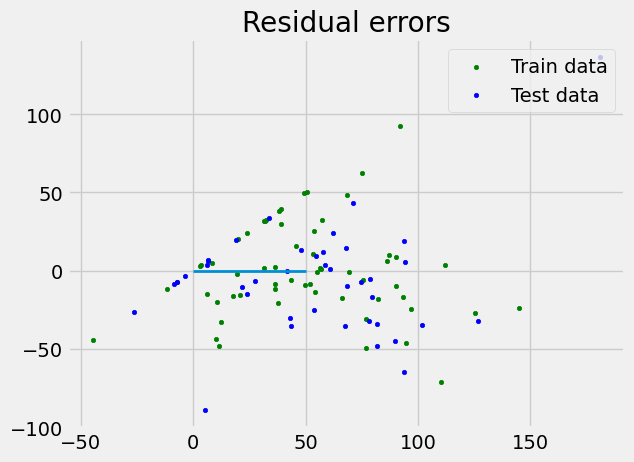

In [14]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()


In [17]:
y_pred = reg.predict(X_test)
y_pred

array([101.89221721,  21.52267595, 180.76355446,  67.8571328 ,
        93.69093028,  58.48774226,  93.95663964,  79.59887266,
        43.52094552,  41.95605492,  78.3106502 , -26.46765087,
        -8.45594023,  81.87217321,  62.15505428,  81.84136632,
        24.08188493,   6.46993832,  57.65980727,  71.31083172,
        78.74964829,  54.57964182,  47.85708528,  19.27633143,
         5.31592853,  -3.61220213,  43.16340931,  27.67145429,
        53.78910468,  89.6691198 ,  33.59703108,  74.75501313,
         6.63734109,   6.03275601,  67.72053691,  68.48300727,
        94.20694557,  60.68787646, 126.66499299,  -6.96362217])

In [19]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 41.71


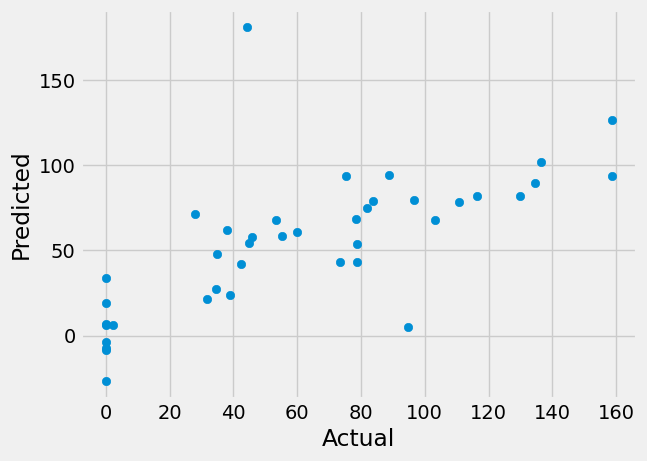

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

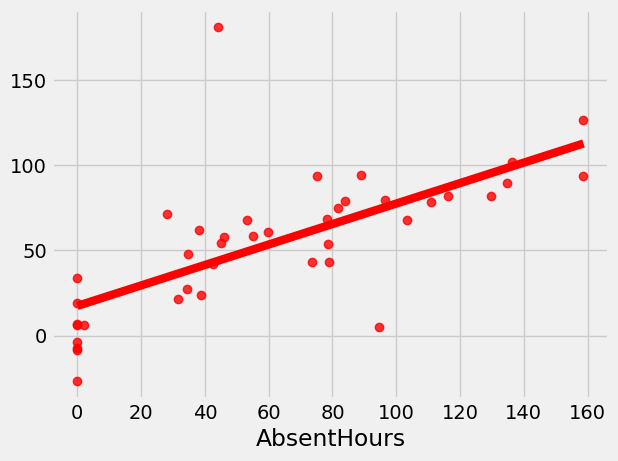

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})


In [25]:
pred_df

,Actual Value,Predicted Value,Difference
80,136.34,101.892217,34.447783
84,31.69,21.522676,10.167324
33,44.27,180.763554,-136.493554
81,53.31,67.857133,-14.547133
93,158.68,93.690930,64.989070
17,55.10,58.487742,-3.387742
36,75.26,93.956640,-18.696640
82,96.61,79.598873,17.011127
69,78.84,43.520946,35.319054
65,42.46,41.956055,0.503945
